# What is Unsupervised Learning?

Unsupervised learning is a type of machine learning where the algorithm learns patterns without labeled data. Unlike supervised learning (which has inputs and outputs), unsupervised learning only has inputs (features).

#### Key Tasks:

* **Clustering** – Grouping similar data points (e.g., customer segmentation)
* **Dimensionality Reduction**  – Reducing features while preserving variance (e.g., PCA)
* **Anomaly Detection** – Identifying outliers in unlabeled data.
* **Repersentation Learning & Self-Supervised Learning** (e.g., training LLMs, autoencoders, contrastive learning)

### Example
The Iris dataset is a classic and widely used dataset in machine learning and statistics. It represents measurements of three different species of Iris flowers: Setosa, Versicolor, and Virginica

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [14]:
# Load Iris dataset

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Add species names
X["species"] = y.map({i: name for i, name in enumerate(iris.target_names)})

# Inspect first rows
print(X.head())
print("\nDataset shape:", X.shape)
print("Classes:", iris.target_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset shape: (150, 5)
Classes: ['setosa' 'versicolor' 'virginica']


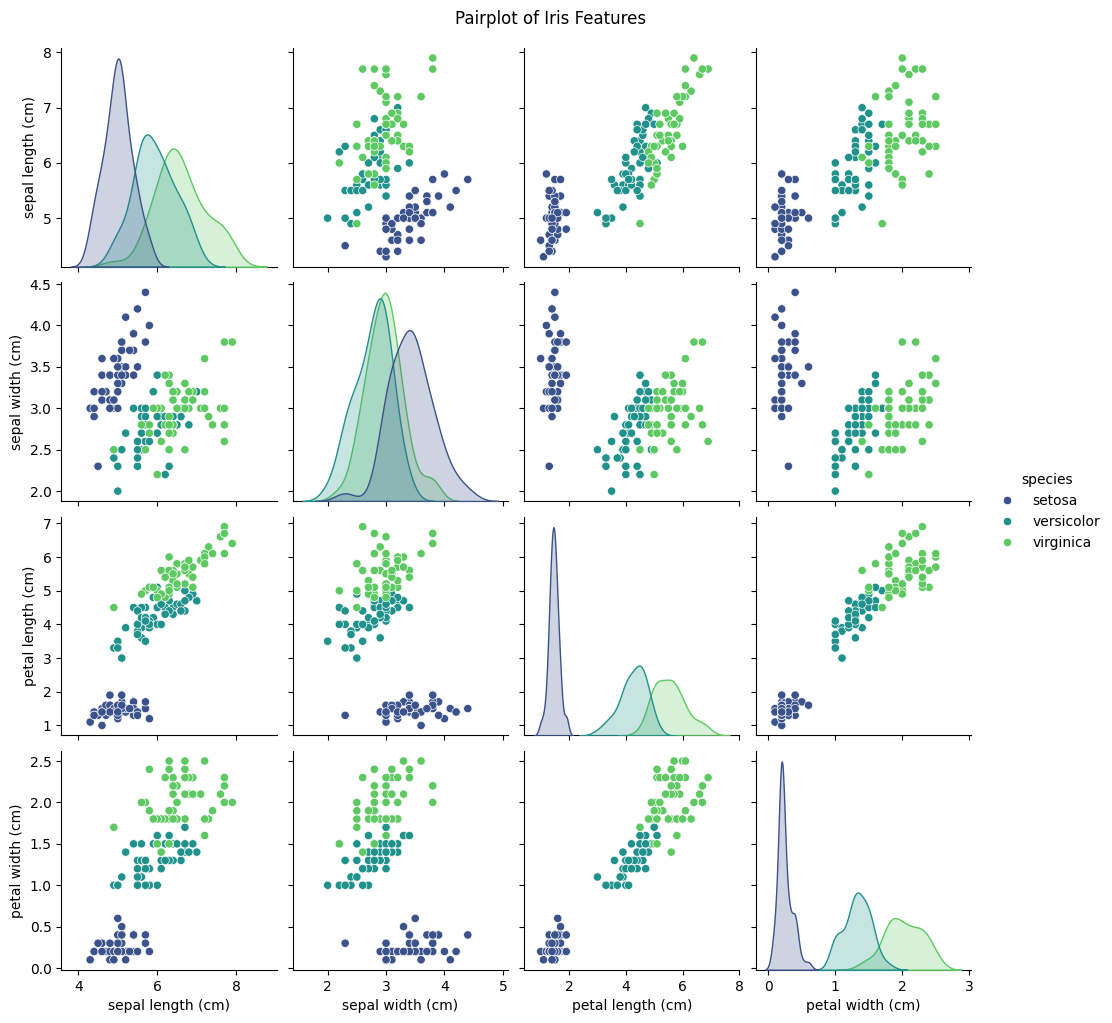

In [15]:
sns.pairplot(X, hue="species", diag_kind="kde", palette="viridis")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

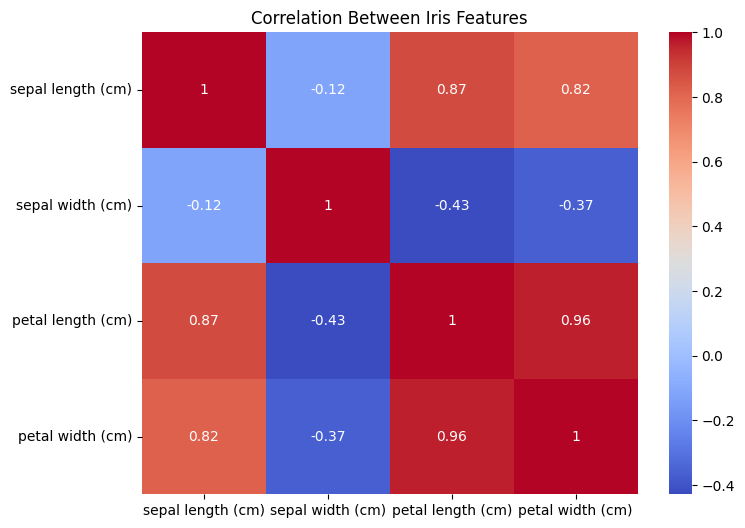

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(X.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Iris Features")
plt.show()

In [11]:
# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris['cluster'] = kmeans.fit_predict(X)

# Add cluster labels
df = X.copy()
df["cluster"] = kmeans.labels_

# Visualize clustering on 2 features (Sepal length vs Sepal width)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="sepal length (cm)", y="sepal width (cm)",
    hue="cluster", palette="viridis", data=df, s=70
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c="red", marker="X", label="Centroids")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()


ValueError: could not convert string to float: np.str_('setosa')

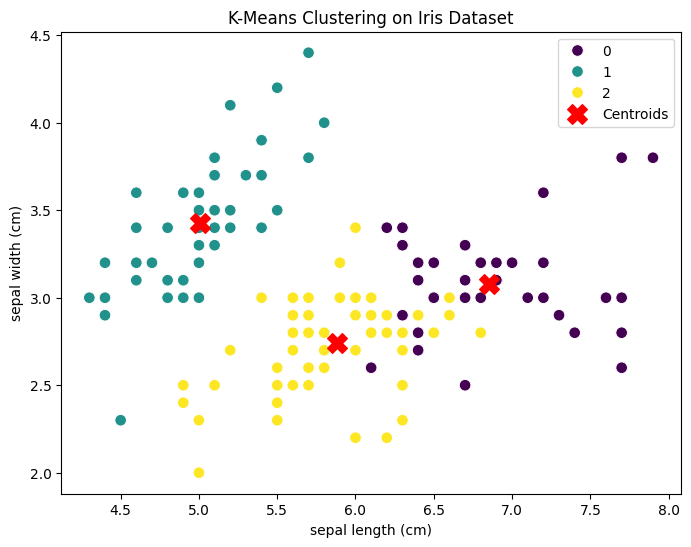

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris['cluster'] = kmeans.fit_predict(X)

# Add cluster labels
df = X.copy()
df["cluster"] = kmeans.labels_

# Visualize clustering on 2 features (Sepal length vs Sepal width)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="sepal length (cm)", y="sepal width (cm)",
    hue="cluster", palette="viridis", data=df, s=70
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c="red", marker="X", label="Centroids")
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()
